# Sequence Analysis (in Progress)

This "Part 1" is a collection of Python-based example codes focussing on sequence analysis on a very basic level (see <a name="TOC">TOC</a>). It is motivated by the many jobs descriptions currently online for genome analysis, next-gen-sequencing (NGS) advances and my fascination towards life science in general. Apologies for the code often being a little sloppy and "easy-going". Due to a limited time frame, priorities were set to "progress & visualization" instead of "finding the most efficient solution" :) <br>
Whenever a function or method is developed to fulfill the goals, it is outsources into the subfolder "ModulesOwn", take a look and have fun. Check out my website (www.bio-century.net) for demos, literature recommendations, links to data bases and further inspirations.

# Table of Contents
0. [Reference Table](#ReferenceTable)
1. [First Steps in Sequence Analysis (Groundwork)](#FirstStepsInSequenceAnalysis)
   1. [Color Strings in Terminal Output](#ColoringStrings)
   2. [Computation of Complement, Reverse and Reverse Complement of ssDNA](#ComplRevRevComplssDNA)
   3. [Identification of Sequences of Interest within a Target Sequence](#IdentOfSOIsInTargetSeq)
   4. [Identification of Multiple Sequences of Interest within a Target Sequence](#IdentMultipleOfSOIsInTargetSeq)
   5. [Data Grouping and Storage](#DataGroupingandStorage)
      1. [Collection / Namedtuples](#CollectionNamedtuples)
      2. [Store in JSON-Format](#JSONDictionary)
2. [Set Up a simple Graphical User Interface (GUI)](#SetUpSimpleGUI)
3. [Mutations, Insertions and Deletions](#MutationsInsertionsandDeletions)
4. [K-mer-Analysis of a Sequence](#KmerAnalysisofaSequence)
   1. [Analysis of tRNA Using K-Fragmentatio](#AnalysisoftRNAUsingKFragmentation)
5. [Data Visualization](#DataVisualization)
   1. [Phred-Quality-Score-Depiciton for short FastQ-Sequences](#PhredQualityScore)
100. [Appendix](#Appendix)
     1.   [.html-Export of Code](#htmlExportOfCode)

# 0. <a name="ReferenceTable"> Reference Table</a>

| Tag or Variable | Meaning              |
|-----------------|----------------------|
| mySequence      | Target Sequence      |
| mySOI           | Sequence of Interest |
| ssDNA           | single-stranded DNA  |

# 1. <a name="FirstStepsInSequenceAnalysis"> First Steps in Sequence Analysis (Groundwork)</a>

## 1.1 <a name="ColoringStrings">Color Strings in Terminal Output</a>

Goal:
1. Load a target DNA-sequence ("mySequence") from external file
2. split the DNA at first incidence of a dedicated subpart ("mySOI") and
3. colorprint a for visualization purposes.

In [1]:
# sources
# - https://www.bioinformatics.org/sms2/random_dna.html
# - https://pkg.go.dev/github.com/whitedevops/colors

# include packages
from ModulesExternal.TerminalColors import TerminalColors

mySOI="CGCCAAAAA"

# load file line-by-line
with open('./ModulesOwn/A_Groundwork_Data/01_01_SeqOfInterest.txt') as f:
    myLines = f.readlines()

# find mySO, split and color it
for ii, mySequence in enumerate(myLines):
    SOI_POS = mySequence.upper().rfind(mySOI)
    print(mySequence[:SOI_POS - 1]
          + f"{TerminalColors.Green}"
          + mySequence[SOI_POS:SOI_POS + len(mySOI)].upper()
          + f"{TerminalColors.Default}", end = '\n')
    print(" "*(SOI_POS - 1)
          + f"{TerminalColors.LightBlue}"
          + mySequence[SOI_POS:SOI_POS + len(mySOI)].upper()
          + f"{TerminalColors.Default}" + mySequence[SOI_POS + 1:], end = '')

ctgggactctagctgatccacccgcctagggcagcacacataggacgtagctCGCCAAAAA
                                                    CGCCAAAAAgccaaaaagacgaacccaccatgcccagacgcatctggctaagctc

## 1.2 <a name="ComplRevRevComplssDNA">Computation of Complement, Reverse and Reverse Complement of ssDNA</a>

Goal: <br>
To determine all modalities of a DNA-single-strand sequence, i.e.
1. the complement-,
2. the reverse- as well as
3. the reverse-complement-strand

and visualize them.

In [2]:
# sources
# - https://www.bioinformatics.org/sms2/random_dna.html

# include modules
from tkinter import *
from tkinter.ttk import *
from ModulesExternal.TerminalColors import TerminalColors
import ModulesOwn.A_Groundwork as Groundwork

mySequenceInput      = "ctgggactctagctgatccacccgcctagggcagcacacataggacgtagctgcgccaaaaagacgaacccaccatgcccagacgcatctggctaagctc"
mySequence           = mySequenceInput.upper()
myNumberOfSOIs       = 3
mySOI                = [""] * myNumberOfSOIs
myColors             = [""] * myNumberOfSOIs
mySequenceColored    = [""] * myNumberOfSOIs
myColorsDNA          = [TerminalColors.Green, TerminalColors.Yellow, TerminalColors.Blue, TerminalColors.Magenta]
myDefaultColor       = TerminalColors.Default

returnSeq = Groundwork.ComplRev(mySequence,"Sequence")
mySequenceColoredDNA = Groundwork.ColorDNA(returnSeq, myColorsDNA, myDefaultColor)
print("Sequence: \t \t", mySequenceColoredDNA, end = '\n')
print("\t \t \t", ''.join('|' for i in returnSeq), end = '\n')

returnSeq = Groundwork.ComplRev(mySequence,"SequenceComplement")
mySequenceColoredDNA = Groundwork.ColorDNA(returnSeq, myColorsDNA, myDefaultColor)
print("Complement: \t \t", mySequenceColoredDNA, end = '\n')
print("")

returnSeq = Groundwork.ComplRev(mySequence,"SequenceReverse")
mySequenceColoredDNA = Groundwork.ColorDNA(returnSeq, myColorsDNA, myDefaultColor)
print("Reverse: \t \t", mySequenceColoredDNA, end = '\n')
print("\t \t \t", ''.join('|' for i in returnSeq), end = '\n')

returnSeq = Groundwork.ComplRev(mySequence,"SequenceReverseComplement")
mySequenceColoredDNA = Groundwork.ColorDNA(returnSeq, myColorsDNA, myDefaultColor)
print("Reverse Complement: \t", mySequenceColoredDNA, end = '\n')

Sequence: 	 	 CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGGACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC
	 	 	 ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Complement: 	 	 GACCCTGAGATCGACTAGGTGGGCGGATCCCGTCGTGTGTATCCTGCATCGACGCGGTTTTTCTGCTTGGGTGGTACGGGTCTGCGTAGACCGATTCGAG

Reverse: 	 	 CTCGAATCGGTCTACGCAGACCCGTACCACCCAAGCAGAAAAACCGCGTCGATGCAGGATACACACGACGGGATCCGCCCACCTAGTCGATCTCAGGGTC
	 	 	 ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Reverse Complement: 	 GAGCTTAGCCAGATGCGTCTGGGCATGGTGGGTTCGTCTTTTTGGCGCAGCTACGTCCTATGTGTGCTGCCCTAGGCGGGTGGATCAGCTAGAGTCCCAG


## 1.3 <a name="IdentOfSOIsInTargetSeq">Identification Sequences of Interest within a Target Sequence</a>

Goal: To identify and mark the the position of a SOI (mySOI) in a given target sequence (mySequence). The return "positionsSOI" shall be
1. 1 if the respective base at position ii of the sequence "mySequence" is part of mySOI
2. \>1 if two mySOI-regions overlap and
3. 0 otherwise.

In [3]:
# sources
# - https://www.bioinformatics.org/sms2/random_dna.html

# include modules
from ModulesExternal.TerminalColors import TerminalColors
import ModulesOwn.A_Groundwork as Groundwork

mySequenceInput      = "ctgggactctagctgatccacccgcctagggcagcacacataggacgtagctgcgccaaaaagacgaacccaccatgcccagacgcatctggctaagctc"
mySequence           = mySequenceInput.upper()
mySOI                = "GG"

myCount, mySOIPositions = Groundwork.SOIPositions(mySequence, mySOI, "countchain")
myColor                 = TerminalColors.Green
myDefaultColor          = TerminalColors.Default

mySequenceColored       = Groundwork.ColorTheSeq(mySequence, mySOIPositions, myColor, myDefaultColor)
mySOIPositionsColored   = Groundwork.ColorTheSeq(mySOIPositions, mySOIPositions, myColor, myDefaultColor)

print("mySequence: \t " + mySequenceColored, end = "\n")
print("mySOIPositions:  " + mySOIPositionsColored, end = '\n')
labelNum, labelX = Groundwork.SeqNumberGen(mySequence, 10)
print("\t\t " + labelNum, end = '\n')
print("\t\t " + labelX, end = '\n')
myCount, mySOIPositionsIndices = Groundwork.SOIPositions(mySequence, mySOI, "indices")
print("Indices: \t", mySOIPositionsIndices, end = "\n")

mySequence: 	 CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGGACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC
mySOIPositions:  0012100000000000000000000000121000000000001100000000000000000000000000000000000000000000001100000000
		 1234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890
		 ---------|---------|---------|---------|---------|---------|---------|---------|---------|---------x
Indices: 	 [2, 3, 28, 29, 42, 90]


## 1.4 <a name="IdentMultipleOfSOIsInTargetSeq">Identification of Multiple Sequences of Interest within a Target Sequence</a>

Goal:

To generalize the algorithm above. The positions of 3 given SOIs (mySOIs) shall be
1. identified in a target sequence (mySequence),
2. labelled individually (green, blue and yellow) and
3. a character of the target sequence shall be colored in red, if there is an overlap between the same or different SOIs.

In [4]:
# include modules
from ModulesExternal.TerminalColors import TerminalColors
import ModulesOwn.A_Groundwork as Groundwork

dictTargetSequence                  = {}
dictSOIs                            = {}
mySequenceInput                     = "ctgggactctagctgatccacccgcctagggcagcacacataggacgtagctgcgccaaaaagacgaacccaccatgcccagacgcatctggctaagctc"
dictTargetSequence["mySequence"]    = mySequenceInput.upper()
dictSOIs["mySOI01"]                 = "AGG"
dictSOIs["mySOI02"]                 = "GAC"
dictSOIs["mySOI03"]                 = "CTAG"

SOICount                            = [0]  * len(dictSOIs)
SOIPositions                        = [0]  * len(dictSOIs)
SOIPositionsIndices                 = []
mySequenceColored                   = [""] * len(dictSOIs)
myColors                            = [TerminalColors.Green, TerminalColors.Blue, TerminalColors.Yellow]
myDefaultColor                      = TerminalColors.Default
myColorWarning                      = TerminalColors.Red

dictSOIPositions                    = {}
dictSOIPositionsIndices             = {}



labelNum, labelX = Groundwork.SeqNumberGen(dictTargetSequence["mySequence"], 10)
print("\t\t\t  " + labelNum, end = '\n')
print("\t\t\t  " + labelX, end = '\n')

for count, value in enumerate(dictSOIs):
    SOICount[count], dictSOIPositions[value]        = Groundwork.SOIPositions(dictTargetSequence["mySequence"], dictSOIs[value], "countchain")
    SOICount[count], dictSOIPositionsIndices[value] = Groundwork.SOIPositions(dictTargetSequence["mySequence"], dictSOIs[value], "indices")
    mySequenceColored[count]                        = Groundwork.ColorTheSeq(dictTargetSequence["mySequence"], dictSOIPositions[value], myColors[count], myDefaultColor)
    SOIPositions[count]                             = dictSOIPositions[value]
    print(value + ": \t \t ", mySequenceColored[count], end = '\n')

mySequenceColored, mySOIPositionsTotalColored, mySOIPositionsTotal = Groundwork.ColorTheSeqMerge(dictTargetSequence["mySequence"],
                                                                                                 SOIPositions,
                                                                                                 myColors,
                                                                                                 myDefaultColor,
                                                                                                 myColorWarning)

print("-" * 126, end = '\n')
print("mySOIs (total): \t ", mySequenceColored, end = '\n')
print("mySOIPositions (total):  ", mySOIPositionsTotalColored, end = '\n')
print("-" * 126, end = '\n')
print("mySOI01 Indices:\t ", dictSOIPositionsIndices["mySOI01"])
print("mySOI02 Indices:\t ", dictSOIPositionsIndices["mySOI02"])
print("mySOI03 Indices:\t ", dictSOIPositionsIndices["mySOI03"])

			  1234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890
			  ---------|---------|---------|---------|---------|---------|---------|---------|---------|---------x
mySOI01: 	 	  CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGGACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC
mySOI02: 	 	  CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGGACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC
mySOI03: 	 	  CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGGACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC
------------------------------------------------------------------------------------------------------------------------------
mySOIs (total): 	  CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGGACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC
mySOIPositions (total):   0000111011110000000000000112210000000000011211000000000000000011100000000000000001110000000000000000
---------------------------------------------------------------------

## 1.5 <a name="DataStorage">Data Grouping and Storage</a>

### 1.5.1 <a name="CollectionNamedtuples">Collection / Namedtuples</a>

For further sequence analysis it might be useful to establish data containers in order to group different variables and parameter that belong together. One possibility in Python is to set up a collection (namedtuples). Please keep in mind, that long target sequences should be excluded / stored externally and then should be assigned by a nametag identifyer.

In [5]:
# sources
# - https://stackoverflow.com/questions/9713352/python-creating-a-list-with-a-unique-automatically-generated-name
# - https://www.pythonpool.com/python-string-to-variable-name/
# - https://www.pythonforbeginners.com/basics/convert-string-to-variable-name-in-python

# include modules
from collections import namedtuple
from ModulesExternal.TerminalColors import TerminalColors
import ModulesOwn.A_Groundwork as Groundwork

dictTargetSequence                  = {}
dictSOIs                            = {}

mySOI                               = []
dictTargetSequence["mySequence01"]  = "ctgggactctagctgatccacccgcctagggcagcacacatagg".upper()
dictTargetSequence["mySequence02"]  = "acgtagctgcgccaaaaagacgaacccaccatgcccagacgcatctggctaagctc".upper()
dictSOIs["mySOI01"]                 = "AGG"
dictSOIs["mySOI02"]                 = "GAC"
dictSOIs["mySOI03"]                 = "CTAG"
SOICount                            = [0]  * len(dictSOIs)
SOIPositions                        = [0]  * len(dictSOIs)

dictIndices                         = {}
mySequenceColored                   = [""] * len(dictSOIs)

myColors                            = [TerminalColors.Green, TerminalColors.Blue, TerminalColors.Yellow]
myColorsStr                         = ["Green", "Blue", "Yellow","Green", "Blue", "Yellow"] # Terminal Colors are tricky to store. Using identifiers instead
myDefaultColor                      = TerminalColors.Default
myColorWarning                      = TerminalColors.Red

mySOIsAndIndices                    = namedtuple("myDataCollection","mySequenceKey mySequenceValue mySOIKey mySOIValue myColors myIndices")
mySOIsAndIndices_array              = []
mySeqPos                            = []

dictSOIPositions                    = {}
dictSOIPositionsIndices             = {}

for mySeqsKey in dictTargetSequence:
    kk = 0
    for kk, myCurrentKey in enumerate(dictSOIs):
        mySOIsAndIndices_array.append(mySOIsAndIndices(mySeqsKey, dictTargetSequence[mySeqsKey], myCurrentKey, dictSOIs[myCurrentKey], myColorsStr[kk], []))

for countTargetSeq, valueTargetSeq in enumerate(dictTargetSequence):
    print(valueTargetSeq)
    labelNum, labelX = Groundwork.SeqNumberGen(dictTargetSequence[valueTargetSeq], 10)
    print("\t\t\t  " + labelNum, end = '\n')
    print("\t\t\t  " + labelX, end = '\n')
    for count, value in enumerate(dictSOIs):
        SOICount[count], dictSOIPositions[value]        = Groundwork.SOIPositions(dictTargetSequence[valueTargetSeq], dictSOIs[value], "countchain")
        SOICount[count], dictSOIPositionsIndices[value] = Groundwork.SOIPositions(dictTargetSequence[valueTargetSeq], dictSOIs[value], "indices")
        mySequenceColored[count]                        = Groundwork.ColorTheSeq(dictTargetSequence[valueTargetSeq], dictSOIPositions[value], myColors[count], myDefaultColor)
        SOIPositions[count]                             = dictSOIPositions[value]
        print(value + ": \t \t ", mySequenceColored[count], end = '\n')
    print("\n")

for SOIs in mySOIsAndIndices_array:
    for ii in range(len(SOIs.mySequenceValue) - len(SOIs.mySOIValue)):
        if SOIs.mySequenceValue[ii:ii + len(SOIs.mySOIValue)] == SOIs.mySOIValue:
            SOIs.myIndices.append(ii)
    print(SOIs)

mySequence01
			  12345678901234567890123456789012345678901234
			  ---------|---------|---------|---------|----
mySOI01: 	 	  CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGG
mySOI02: 	 	  CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGG
mySOI03: 	 	  CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGG


mySequence02
			  12345678901234567890123456789012345678901234567890123456
			  ---------|---------|---------|---------|---------|------
mySOI01: 	 	  ACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC
mySOI02: 	 	  ACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC
mySOI03: 	 	  ACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC


myDataCollection(mySequenceKey='mySequence01', mySequenceValue='CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGG', mySOIKey='mySOI01', mySOIValue='AGG', myColors='Green', myIndices=[27])
myDataCollection(mySequenceKey='mySequence01', mySequenceValue='CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGG', mySOIKey='mySOI02', mySOIValue='GAC', myColors='Blue', myIndic

The accessibility to the info here stored as values can be a little tricky though. Here are two possibilities to do that:

In [6]:
#            TargetSeq       SOI        Item2Look4
SEARCH_ITEM=["mySequence02", "mySOI02", "myColors"]

INDEX_ARRAY=(list(dictTargetSequence.keys()).index(SEARCH_ITEM[0])) * len(dictSOIs) + (list(dictSOIs.keys()).index(SEARCH_ITEM[1]))
print("You are asking for the value of \"" + SEARCH_ITEM[2] + "\" for the sequence of interest \"" + SEARCH_ITEM[1] + "\" within the target sequence \"" + SEARCH_ITEM[0] + "\".")
print("-" * 124, end = '\n')
res = mySOIsAndIndices_array.__getitem__(INDEX_ARRAY).__getitem__(mySOIsAndIndices._fields.index(SEARCH_ITEM[2]))
print("The value is as follows: \t ", res)

You are asking for the value of "myColors" for the sequence of interest "mySOI02" within the target sequence "mySequence02".
----------------------------------------------------------------------------------------------------------------------------
The value is as follows: 	  Blue


In [7]:
# Data-pair2look4:
#           key          value
SEARCH_ITEM=["mySOIKey", "mySOI02"]

print("All items fulfilling the requirements:")
print("-" * 197, end = '\n')
for SOIs in mySOIsAndIndices_array:
    test_data = SOIs.__getitem__(mySOIsAndIndices._fields.index(SEARCH_ITEM[0]))
    if test_data == SEARCH_ITEM[1]:
        res = SOIs.__getitem__(mySOIsAndIndices._fields.index(SEARCH_ITEM[0]))
        print(SOIs)

All items fulfilling the requirements:
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
myDataCollection(mySequenceKey='mySequence01', mySequenceValue='CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGG', mySOIKey='mySOI02', mySOIValue='GAC', myColors='Blue', myIndices=[4])
myDataCollection(mySequenceKey='mySequence02', mySequenceValue='ACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC', mySOIKey='mySOI02', mySOIValue='GAC', myColors='Blue', myIndices=[18, 37])


### 1.5.2 <a name="JSONDictionary">Store in JSON-Format</a>

Probably more convient, common and thus advisory is to use a dictionary / JSON-format combination.

Step 1: Dicitonary Setup and Test-Readout

In [8]:
# sources
# https://python.plainenglish.io/how-to-read-and-write-to-json-file-in-python-ef35460aaeb5

# Dicitonary Setup
dictSeqGroup =  {
                "SOIs": {
                        "mySOI01": {
                        "Seq": "AGG",
                        "myColor": "Green",
                        },
                        "mySOI02": {
                        "Seq": "GAC",
                        "myColor": "Blue",
                        },
                        "mySOI03": {
                        "Seq": "CTAG",
                        "myColor": "Yellow",
                        }
                },
                "targetSeq": {
                        "mySequence01": "CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGG",
                        "mySequence02": "ACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC"
                }
                }

# Test-Readout
print(dictSeqGroup["targetSeq"]["mySequence02"])     # <-- 1. query
print(dictSeqGroup["SOIs"]["mySOI03"]["myColor"])    # <-- 2. query

ACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC
Yellow


Step 2: Data Export into JSON-Format

In [9]:
# sources
# https://pynative.com/python-prettyprint-json-data/
# https://stackoverflow.com/questions/73800772/returning-jsondecodeerror-expecting-value

# include modules
import json

with open("./ModulesOwn/A_Groundwork_Data/01_05_02_DictSeqGroup.json", "w") as outfile:
    json.dump(dictSeqGroup, outfile, indent = 4, sort_keys = True)

Step 3: Run Operations on Data and Save Modifications. Here: We determine and add the SOIPositions-Indices to each tarSeq-mySOI-pair, include the data in the master-dictionary and save everything in JSON-format.

In [10]:
myColors                            = [TerminalColors.Green, TerminalColors.Blue, TerminalColors.Yellow]
myDefaultColor                      = TerminalColors.Default
myColorWarning                      = TerminalColors.Red

# (Re-)Open JSON file
with open('./ModulesOwn/A_Groundwork_Data/01_05_02_DictSeqGroup.json', 'r') as openfile:
    # Reading from json file
    dictSeqGroup = json.load(openfile)

# Determine and print indices in terminal
for countTargetSeq, valueTargetSeq in enumerate(dictSeqGroup["targetSeq"].keys()):    
    labelNum, labelX = Groundwork.SeqNumberGen(dictSeqGroup["targetSeq"][valueTargetSeq], 10)
    print("\t\t\t  " + labelNum, end = '\n')
    print("\t\t\t  " + labelX, end = '\n')
    for count, value in enumerate(dictSeqGroup["SOIs"].keys()):
        SOICount[count], dictSOIPositions[value]        = Groundwork.SOIPositions(dictSeqGroup["targetSeq"][valueTargetSeq], dictSeqGroup["SOIs"][value]["Seq"], "countchain")
        SOICount[count], dictSOIPositionsIndices[value] = Groundwork.SOIPositions(dictSeqGroup["targetSeq"][valueTargetSeq], dictSeqGroup["SOIs"][value]["Seq"], "indices")
        mySequenceColored[count]                        = Groundwork.ColorTheSeq(dictSeqGroup["targetSeq"][valueTargetSeq], dictSOIPositions[value], myColors[count], myDefaultColor)
        SOIPositions[count]                             = dictSOIPositions[value]
        print(value + ": \t \t ", mySequenceColored[count], end = '\n')
        if "myIndices" in dictSeqGroup["SOIs"][value]:
            pass
        else:
            dictSeqGroup["SOIs"][value]["myIndices"] = {}
        dictSeqGroup["SOIs"][value]["myIndices"][valueTargetSeq] = dictSOIPositionsIndices[value]

    for count, value in enumerate(dictSeqGroup["SOIs"].keys()):
        print("\t\t\t ", dictSOIPositionsIndices[value], end = '\n')
    print("\n")

# Write info into json file
with open("./ModulesOwn/A_Groundwork_Data/01_05_02_DictSeqGroup.json", "w") as outfile:
    json.dump(dictSeqGroup, outfile, indent = 4, sort_keys = True)

			  12345678901234567890123456789012345678901234
			  ---------|---------|---------|---------|----
mySOI01: 	 	  CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGG
mySOI02: 	 	  CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGG
mySOI03: 	 	  CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGG
			  [27, 41]
			  [4]
			  [8, 25]


			  12345678901234567890123456789012345678901234567890123456
			  ---------|---------|---------|---------|---------|------
mySOI01: 	 	  ACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC
mySOI02: 	 	  ACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC
mySOI03: 	 	  ACGTAGCTGCGCCAAAAAGACGAACCCACCATGCCCAGACGCATCTGGCTAAGCTC
			  []
			  [18, 37]
			  []




Step 4: Reload JSON-file and print the content. The indices are now added to each targetSeq-mySOI-pair.

In [11]:
# sources
# https://www.geeksforgeeks.org/read-a-file-line-by-line-in-python/

# Using readlines()
file1 = open('./ModulesOwn/A_Groundwork_Data/01_05_02_DictSeqGroup.json', 'r')
Lines = file1.readlines()
 
count = 0
# Strips the newline character
for line in Lines:
    count += 1
    print(line, end = '')

{
    "SOIs": {
        "mySOI01": {
            "Seq": "AGG",
            "myColor": "Green",
            "myIndices": {
                "mySequence01": [
                    27,
                    41
                ],
                "mySequence02": []
            }
        },
        "mySOI02": {
            "Seq": "GAC",
            "myColor": "Blue",
            "myIndices": {
                "mySequence01": [
                    4
                ],
                "mySequence02": [
                    18,
                    37
                ]
            }
        },
        "mySOI03": {
            "Seq": "CTAG",
            "myColor": "Yellow",
            "myIndices": {
                "mySequence01": [
                    8,
                    25
                ],
                "mySequence02": []
            }
        }
    },
    "targetSeq": {
        "mySequence01": "CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACACATAGG",
        "mySequence02": "ACGTAGCTGCGCCAAAAAGACGAAC

# 2. <a name="SetUpSimpleGUI">Set Up a simple Graphical User Interface (GUI)</a>

Goal:

Set up a simple first draft of a Grahical User Interface (GUI) for future applications. The GUI should
1. analyse a given DNA-Sequence with respect to 3 mySOIs and color code the respective positions in the target sequence
2. save the results in an external file
3. look fancy
4. provide space for a next analysis step. Prefered is a tab-design of the GUI.

mySOIs (total): 	 	 CTGGGACTCTAGCTGATCCACCCGCCTAGGGCAGCACA
mySOIPositions (total) : 	 00001110111100000000000001122100000000


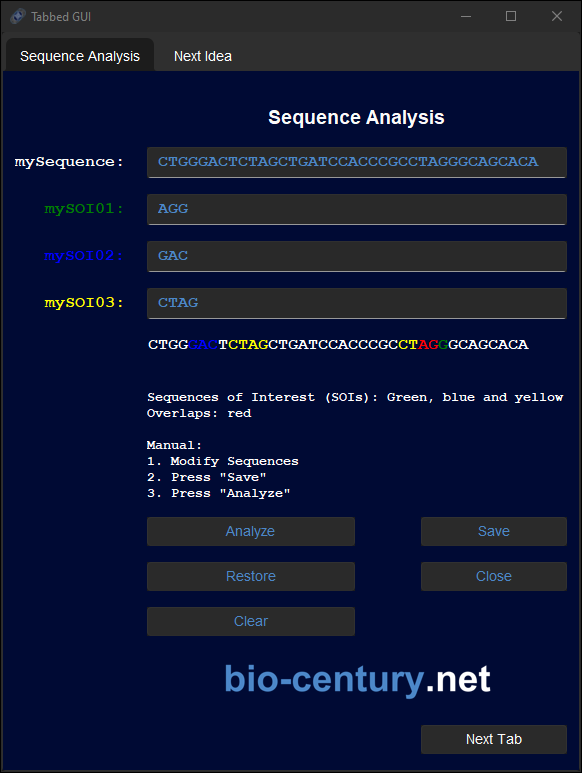

In [12]:
# sources
# https://github.com/rdbende/Azure-ttk-theme
# https://stackoverflow.com/questions/18052395/array-of-buttons-in-python
# https://www.tutorialspoint.com/how-to-save-the-contents-of-a-textbox-in-tkinter
# https://www.plus2net.com/python/tkinter-grid.php
# https://stackoverflow.com/questions/17251016/python-tkinter-how-to-change-the-windows-border-color
# https://learn.microsoft.com/en-us/windows/win32/api/dwmapi/ne-dwmapi-dwmwindowattribute
# https://www.tutorialspoint.com/how-to-change-the-color-of-certain-words-in-a-tkinter-text-widget
# https://www.javatpoint.com/python-tkinter-text
# https://www.pythontutorial.net/tkinter/tkinter-validation/
# https://www.delftstack.com/howto/python-tkinter/tkinter-tabs/
# https://stackoverflow.com/questions/53461066/python-showing-next-tab-by-pressing-a-button
# https://stackoverflow.com/questions/70224682/is-there-a-way-in-tkinter-to-left-align-tabs-notebook


# include modules
from tkinter import *
from tkinter.ttk import *
import tkinter as tk
from tkinter import ttk
from PIL import Image, ImageTk
import TKinterModernThemes as TKMT
import ModulesOwn.A_Groundwork as Groundwork
import ModulesOwn.B_SimpleTabbedGUI as SimpleTabbedGUI
from ModulesExternal.TerminalColors import TerminalColors
from tkinter import Text, END
import numpy as np
from IPython.display import Image as ImageIPython
import json
import sys


def main():
    # convert BCN-image to .ico in order to make image applicable as a logo for the window frame
    from PIL import Image
    logo = Image.open("./icons/logoBCNicon.png")
    logo.save("./icons/logoBCNicon.ico", format = 'ICO')


    # define colors and constants
    myForegroundColor          = "#4c87c8"
    myBackgroundColor          = "#000a34"
    dictSequence               = {}
    mySOI                      = []
    myNumberLabelBlank         = 30
    myLabelBlank               = [""] * myNumberLabelBlank
    myDefaultColor             = TerminalColors.Default
    myColorWarning             = TerminalColors.Red
    myDefaultColorTextBox      = "white"
    myColorWarningTextBox      = "red"
    myInput                    = [""] * 4
    myColorsTextBox = []
    myColors                   = [TerminalColors.Green, TerminalColors.Blue, TerminalColors.Yellow]


    # initialize GUI
    root = tk.Tk()

    # set graphical appearance
    root.configure(background = myBackgroundColor)
    Groundwork.DarkTitleBar(root)
    root.title('Tabbed GUI')
    root.tk.call("source", "./_themes/Sun-Valley-ttk-theme-main/sv.tcl")
    root.tk.call("set_theme", "dark")
    root.iconbitmap("./icons/logoBCNicon.ico")
    ttk.Style().configure("RB.TButton", foreground = myForegroundColor)

    # create a tab control that manages multiple tabs
    tabsystem = ttk.Notebook(root)

    # create new tabs using frame widget
    tab1 = Frame(tabsystem)
    tab2 = Frame(tabsystem)

    # initialize some blank labels used for GUI design
    for ii in range(0, len(myLabelBlank)):
        myLabelBlank[ii]   = ttk.Label(tab1, text = "   ", background = myBackgroundColor)

    # set style
    s = ttk.Style(root)
    s.configure("TFrame",        background = myBackgroundColor, foreground = myBackgroundColor)
    s.configure("TNotebook",     background = myBackgroundColor, foreground = myBackgroundColor)
    s.configure("TNotebook.Tab", background = myBackgroundColor, foreground = "white")


    # load (previous) dataset
    with open("./ModulesOwn/B_SimpleTabbedGUI_Data/02_Sequence.json", "r") as openfile:
        dictSequence = json.load(openfile)


    for ii in range(len(dictSequence["SOIs"])):
        myColorsTextBox.append(dictSequence["SOIs"]["mySOI""{:02d}".format(ii+1)]["myColor"])


    # set top label
    columnCount = 0; blankCount = 0
    myLabelBlank[blankCount].grid(row = columnCount, column = 0); blankCount  += 1
    myLabelBlank[blankCount].grid(row = columnCount, column = 2); blankCount  += 1
    myLabelBlank[blankCount].grid(row = columnCount, column = 4); blankCount  += 1
    myLabelBlank[blankCount].grid(row = columnCount, column = 6); columnCount += 1
    myLabelBlank[blankCount].grid(row = columnCount, column = 8); columnCount += 1

    myLabel = tk.Label(tab1, text = "Sequence Analysis", font = ('Arial', 14, 'bold'), bg = myBackgroundColor)
    myLabel.grid(row = columnCount, column = 3, rowspan = 1, columnspan = 5, sticky = tk.W + tk.E)
    columnCount += 1
    blankCount  += 1
    myLabelBlank[blankCount].grid(row = columnCount, column = 0)
    myValidation                    = [] * 4


    # set Input textboxes and labels
    for ii in range(len(dictSequence["SOIs"]) + 1):
        blankCount += 1
        myLabelBlank[blankCount+ii].grid(row = columnCount, column = 2)
        columnCount += 1
        if ii == 0:
            currentKey = "mySequence"
            currentValue = dictSequence["mySequence"]
            myLabel     = ttk.Label(tab1, text = currentKey + ": ", anchor="e", justify = "left",
                                    font = ('Courier New', 12, 'bold'), 
                                    foreground = "white", background = myBackgroundColor)
            myLabel.grid(row = columnCount, column = 1, sticky = tk.W + tk.E)
            myInput[ii] = ttk.Entry(tab1, width = 40, style = "EntryStyle.TEntry",
                                        font = ('Courier New', 12, 'bold'),
                                        foreground = myForegroundColor, background = myBackgroundColor)
            myInput[ii].insert("end", currentValue)
        else:
            currentKey = "mySOI""{:02d}".format(ii)
            currentValue = dictSequence["SOIs"][currentKey]["Seq"]
            myLabel     = ttk.Label(tab1, text = currentKey + ": ", anchor = "e", justify = "left",
                                    font = ('Courier New', 12, 'bold'), background = myBackgroundColor,
                                    foreground = myColorsTextBox[ii - 1])
            myLabel.grid(row = columnCount, column = 1, sticky = tk.W + tk.E)
            myInput[ii] = ttk.Entry(tab1, width = 40, style = "EntryStyle.TEntry",
                                        font = ('Courier New', 12, 'bold'),
                                        foreground = myForegroundColor, background = myBackgroundColor)
            myInput[ii].insert("end", currentValue)
        myInput[ii].grid(row = columnCount, column = 3, rowspan = 1, columnspan = 5)
        blankCount += 1; columnCount += 1
        myLabelBlank[blankCount + ii].grid(row = columnCount, column = 2)


    columnCount += 1; blankCount += 1
    myLabelBlank[blankCount].grid(row = columnCount, column = 0); columnCount += 1


    # determine colored result for textfield of GUI
    myNumberOfSOIs       = len(dictSequence["SOIs"])
    myCount              = [0] * myNumberOfSOIs
    mySOIPositions       = [0] * myNumberOfSOIs
    mySequenceColored    = [""] * myNumberOfSOIs
    mySequence           = dictSequence["mySequence"]

    columnCount  += 1
    for ii in range(len(dictSequence["SOIs"])):
        currentKey = "mySOI""{:02d}".format(ii + 1)
        currentValue = dictSequence["SOIs"][currentKey]["Seq"]
        myCount[ii], mySOIPositions[ii] = Groundwork.SOIPositions(mySequence, currentValue, "countchain")
        mySequenceColored[ii]           = Groundwork.ColorTheSeq(mySequence, mySOIPositions[ii], myColors[ii], myDefaultColor)

    mySequenceColored, mySOIPositionsTotalColored, mySOIPositionsTotal = Groundwork.ColorTheSeqMerge(mySequence, mySOIPositions, myColors,
                                                                                            myDefaultColor, myColorWarning)
    print("mySOIs (total): \t \t", mySequenceColored, end = '\n')
    print("mySOIPositions (total) : \t", mySOIPositionsTotalColored, end = '\n')
    myLabel = ttk.Label(text = mySequence, font=('Arial', 14, 'bold'))


    # write colored result in textfield of GUI
    myText = Text(tab1, height = 3, width = 35, background = myBackgroundColor, highlightthickness = 0,
                borderwidth = 0, font = ('Courier New', 12, 'bold'))
    SimpleTabbedGUI.AnalyseSeq(myText, myNumberOfSOIs, mySequence, mySOIPositions, myColorsTextBox,
            myDefaultColorTextBox, myColorWarningTextBox, myBackgroundColor, tab1, columnCount, myInput)
    myText.delete
    myTextnew= Text(tab1, height = 2, width = 35, background = myBackgroundColor, highlightthickness = 0,
                    borderwidth = 0, font = ('Courier New', 12, 'bold'))
    myTextnew = SimpleTabbedGUI.ColorTheSeqMergeGUI(myTextnew, dictSequence["mySequence"], mySOIPositions, myColorsTextBox,
                                                myDefaultColorTextBox, myColorWarningTextBox)
    myTextnew.grid(row = columnCount, column = 3, rowspan = 1, columnspan = 5, sticky = tk.W + tk.E)
    myColumnCountAnalysisStatic = columnCount; columnCount += 1


    # imprint user manual
    columnCount  += 1; blankCount += 1
    myLabelBlank[blankCount].grid(row = columnCount, column = 0); columnCount += 1
    myLabelLegend  = ttk.Label(tab1, text = "Sequences of Interest (SOIs): Green, blue and yellow", anchor = "w", justify = "left",
                                font = ('Courier New', 10, 'bold'), background = myBackgroundColor, foreground = "white")
    myLabelLegend.grid(row = columnCount, column = 3, rowspan = 1, columnspan = 5, sticky = tk.W + tk.E); columnCount += 1
    myLabelLegend  = ttk.Label(tab1, text = "Overlaps: red", anchor = "w", justify = "left", font = ('Courier New', 10, 'bold'),
                                background = myBackgroundColor, foreground = "white")
    myLabelLegend.grid(row = columnCount, column = 3, rowspan = 1, columnspan = 5, sticky = tk.W + tk.E)
    columnCount  += 1; columnCount += 1; blankCount += 1
    myLabelBlank[blankCount].grid(row = columnCount, column = 0); columnCount += 1
    myLabelMan     = ttk.Label(tab1,text = "Manual: ", anchor = "w", justify = "left", font = ('Courier New', 10, 'bold'),
                            background = myBackgroundColor, foreground = "white")
    myLabelMan.grid(row = columnCount, column = 3, rowspan = 1, columnspan = 5, sticky = tk.W + tk.E); columnCount += 1
    myLabelMan     = ttk.Label(tab1,text = "1. Modify Sequences", anchor = "w", justify="left", font = ('Courier New', 10, 'bold'),
                            background = myBackgroundColor, foreground = "white")
    myLabelMan.grid(row = columnCount, column = 3, rowspan = 1, columnspan = 5, sticky = tk.W + tk.E); columnCount += 1
    myLabelMan     = ttk.Label(tab1,text = "2. Click \"Analyze\"", anchor = "w", justify = "left", font = ('Courier New', 10, 'bold'),
                            background = myBackgroundColor, foreground = "white")
    myLabelMan.grid(row = columnCount, column = 3, rowspan = 1, columnspan = 5, sticky = tk.W + tk.E); columnCount += 1
    myLabelMan     = ttk.Label(tab1,text = "3. Click \"Save\"", anchor = "w", justify = "left", font = ('Courier New', 10, 'bold'),
                            background = myBackgroundColor, foreground = "white")
    myLabelMan.grid(row = columnCount, column = 3, rowspan = 1, columnspan = 5, sticky = tk.W + tk.E)
    columnCount  += 1; blankCount += 1
    myLabelBlank[blankCount].grid(row = columnCount, column = 0); columnCount += 1


    # Set control buttons and define actions
    myButtonAnalysis = ttk.Button(tab1,text = "Analyze", style = "RB.TButton", command = lambda: SimpleTabbedGUI.AnalyseSeq(myText, myNumberOfSOIs,
                                                                                                            mySequence, mySOIPositions,
                                                                                                            myColorsTextBox, myDefaultColorTextBox,
                                                                                                            myColorWarningTextBox, myBackgroundColor,
                                                                                                            tab1, myColumnCountAnalysisStatic, myInput))
    myButtonAnalysis.grid(row = columnCount, column = 3, rowspan = 1, columnspan = 3, sticky = tk.W + tk.E)
    myButtonSave  = ttk.Button(tab1, text = "Save", style = "RB.TButton", command = lambda: SimpleTabbedGUI.SaveSequence(dictSequence, myInput))
    myButtonSave.grid(row = columnCount, column = 7, sticky = tk.W + tk.E)

    columnCount += 1; blankCount += 1
    myLabelBlank[blankCount].grid(row = columnCount, column = 0); columnCount += 1
    myButton      = ttk.Button(tab1, text = "Restore", style = "RB.TButton", command = lambda: SimpleTabbedGUI.LoadDataset(myInput))
    myButton.grid(row = columnCount, column = 3, rowspan = 1, columnspan = 3, sticky = tk.W + tk.E)
    myButtonClose = ttk.Button(tab1, text = "Close", style = "RB.TButton", command = root.destroy)
    myButtonClose.grid(row = columnCount, column = 7, sticky = tk.W + tk.E)

    columnCount += 1; blankCount += 1
    myLabelBlank[blankCount].grid(row = columnCount, column = 0); columnCount += 1
    myButtonClear = ttk.Button(tab1, text = "Clear", style = "RB.TButton", command = lambda: SimpleTabbedGUI.ClearTextandFields(dictSequence, myInput))
    myButtonClear.grid(row = columnCount, column = 3, rowspan = 1, columnspan = 3, sticky = tk.W + tk.E)
    columnCount += 1; blankCount += 1
    myLabelBlank[blankCount].grid(row = columnCount, column = 0); columnCount += 1


    # set logo bio-century.net
    myImage        = Image.open('./icons/logoBCN.png')
    imageResized = myImage.resize((288, 47))
    myIcon=ImageTk.PhotoImage(imageResized)
    columnCount  += 1; blankCount += 1
    myLabelBlank[blankCount].grid(row = columnCount, column = 0)
    myLogoLabel    = ttk.Label(tab1, image = myIcon, padding = 5, background = myBackgroundColor)
    myLogoLabel.grid(row = columnCount, column = 3, rowspan = 1, columnspan = 5)

    columnCount += 1; blankCount += 1
    myLabelBlank[blankCount].grid(row = columnCount, column = 0); columnCount += 1
    myButtonNext   = ttk.Button(tab1, text="Next Tab", command = lambda: tabsystem.select(tab2))
    myButtonNext.grid(row = columnCount, column=7, sticky = tk.W + tk.E); columnCount += 1
    columnCount  += 1; blankCount += 1
    myLabelBlank[blankCount].grid(row = columnCount, column = 0); columnCount += 1


    # set "Next Idea" tab
    label2nd = Label(tab2, text = "Here is some space for a new idea!", background = myBackgroundColor)
    label2nd.grid(column = 1, row = 1, padx = 170,pady = 250)
    tabsystem.add(tab1, text = 'Sequence Analysis')
    tabsystem.add(tab2, text = 'Next Idea')
    tabsystem.grid()

    display(ImageIPython(filename = './figures/TabbedGUI.png'))
    root.mainloop()


if __name__ == "__main__":
    main()

# 3. <a name="MutationsInsertionsandDeletions">Mutations, Insertions and Deletions</a>

In [13]:
# 2BeWorkedOn

# 4. <a name="KmerAnalysisofaSequence">K-mer-Analysis of a Sequence</a>

This section is about the analysis of a target sequence in view of it's k-mer subcomponents. It is a direct preparation to put together small DNA-fragments with overlap in order to get the full picture, as it is required for NGS-data exploration of very large DNA sequences.

## 4.1 <a name="AnalysisoftRNAUsingKFragmentation">Analysis of tRNA Using K-Fragmentation</a>

---------------------------------------------------------------------------------------------------
			Tertiary structure scheme of a tRNA molecule
---------------------------------------------------------------------------------------------------
Acceptor stem: 	 purple 
D arm: 		 red 
Anticodon arm: 	 blue 
Anticodon: 	 black 
CCA tail: 	 yellow 
Variable loop: 	 orange 
T arm: 		 green

---------------------------------------------------------------------------------------------------
Target Sequence: 	AGCGCCGUGGCGCAGDGGAAGCGCGCAGGGCUCAUAACCCUGAUGDCCUCGGAUCGAAACCGAGCGGCGCUACCA
RNA-Sequence: S. cerevisiae initiator methionyl tRNAs
Source: Kolitz SE, Lorsch JR. Eukaryotic initiator tRNA: finely tuned and ready for action.
FEBS Lett. 2010 Jan 21;584(2):396-404. doi: 10.1016/j.febslet.2009.11.047.
PMID: 19925799; PMCID: PMC2795131.
https://pubmed.ncbi.nlm.nih.gov/19925799/
---------------------------------------------------------------------------------------------------


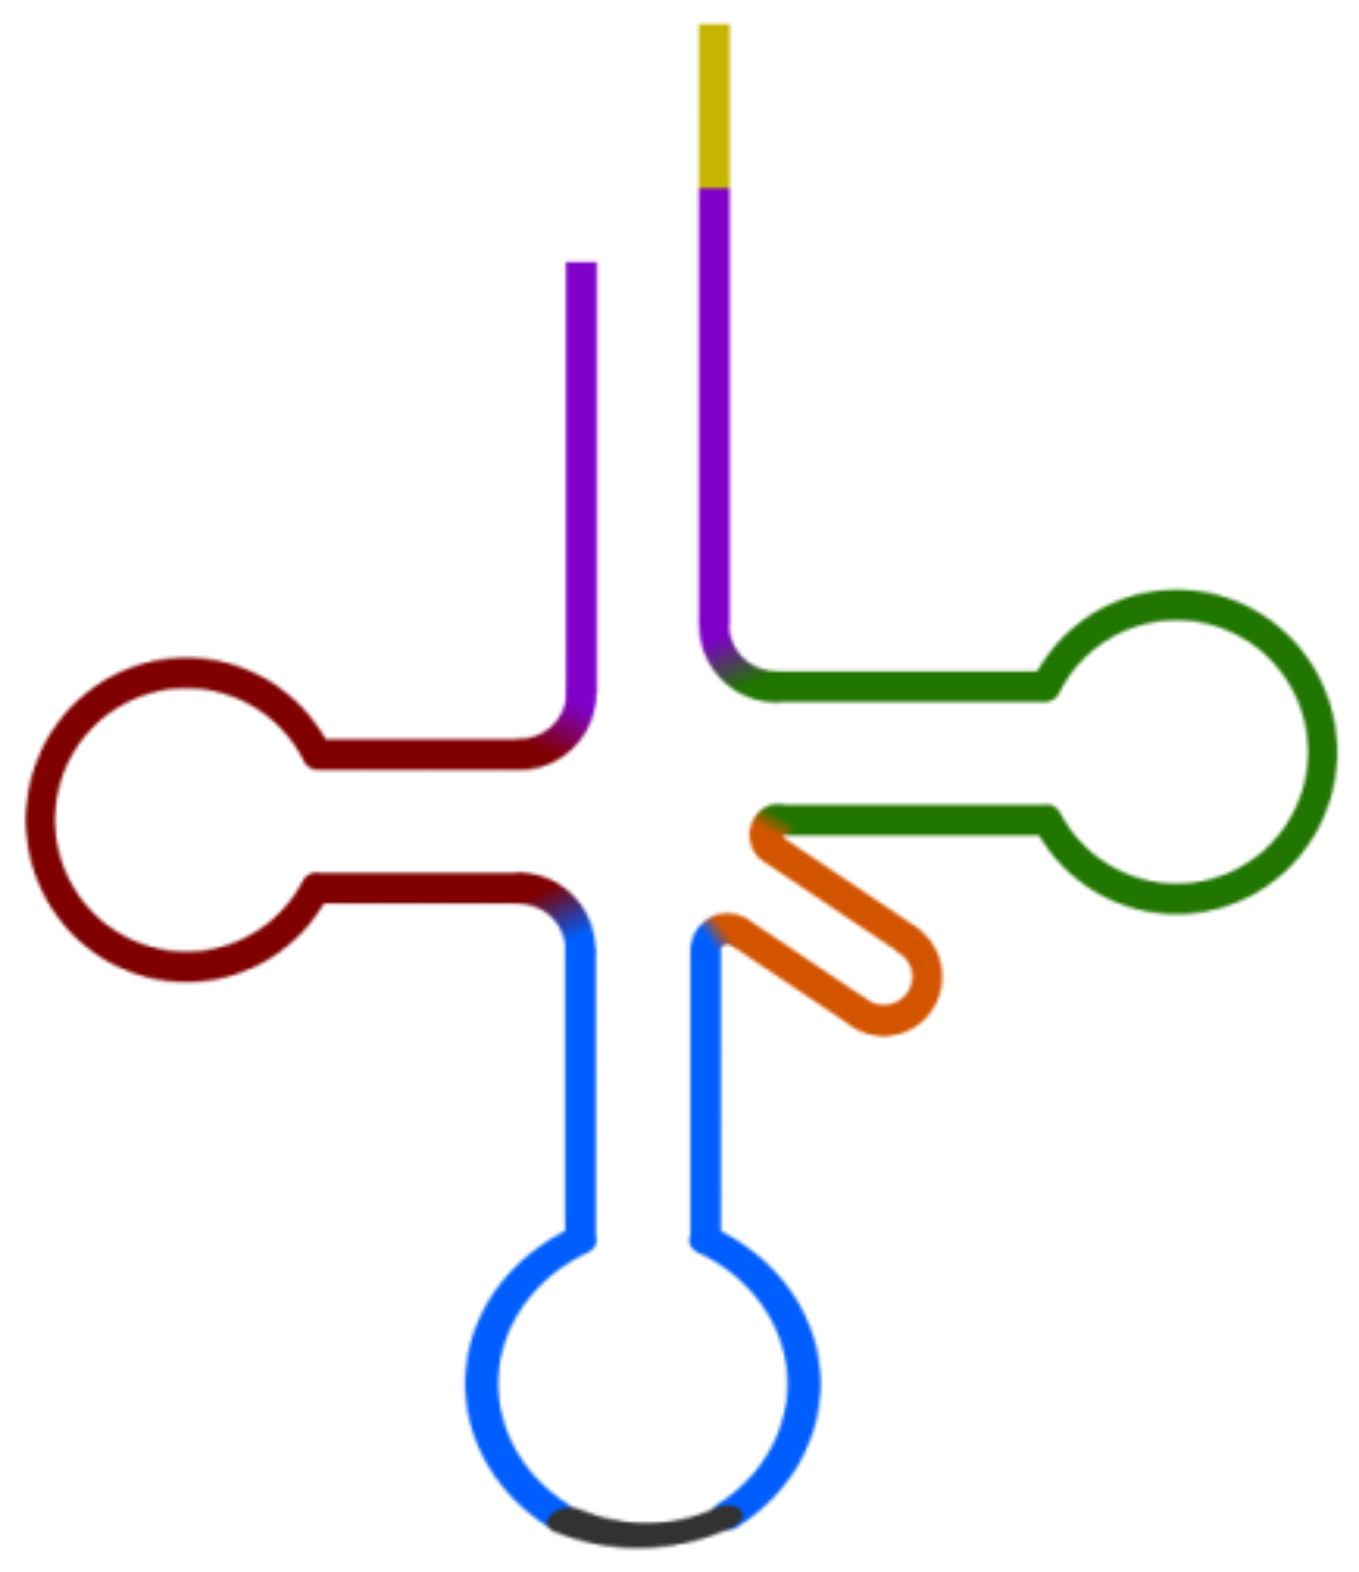

Tertiary structure scheme of t-RNA published by user Yikrazuul under
the Attribution-ShareAlike 3.0 Unported (CC BY-SA 3.0) license.
https://en.wikipedia.org/wiki/Transfer_RNA#/media/File:TRNA-Phe_yeast_1ehz.png

---------------------------------------------------------------------------------------------------
				Palindroms as identified by algorithm
---------------------------------------------------------------------------------------------------
Forward Sequence: 	 green
Reverse Complement: 	 blue
Overlays: 		 yellow

KLENGTH = 5
---------------------------------------------------------------------------------------------------
Target Sequence: 	AGCGCCGUGGCGCAGDGGAAGCGCGCAGGGCUCAUAACCCUGAUGDCCUCGGAUCGAAACCGAGCGGCGCUACCA
---------------------------------------------------------------------------------------------------
Palindroms 01: 		AGCGCCGUGGCGCAGDGGAAGCGCGCAGGGCUCAUAACCCUGAUGDCCUCGGAUCGAAACCGAGCGGCGCUACCA
Palindroms 02: 		AGCGCCGUGGCGCAGDGGAAGCGCGCAGGGCUCAUAACCCUGAUGDCCUCGGAUC

In [14]:
# sources
# RNA-Sequence: S. cerevisiae initiator methionyl tRNAs
# Kolitz SE, Lorsch JR. Eukaryotic initiator tRNA: finely tuned and ready for action.
# FEBS Lett. 2010 Jan 21;584(2):396-404. doi: 10.1016/j.febslet.2009.11.047.
# PMID: 19925799; PMCID: PMC2795131.
# https://pubmed.ncbi.nlm.nih.gov/19925799/

# Tertiary structure scheme of t-RNA published by user Yikrazuul under
# the Attribution-ShareAlike 3.0 Unported (CC BY-SA 3.0) license
# https://en.wikipedia.org/wiki/Transfer_RNA#/media/File:TRNA-Phe_yeast_1ehz.png
# adapted in terms of labeling

# include modules
import json
import ModulesOwn.A_Groundwork as Groundwork
import ModulesOwn.D_KmerAnalysis as KmerAnalysis
from Bio.Seq import Seq
from sty import fg, bg, ef, rs
from IPython.display import Image as ImageIPython
from ModulesExternal.TerminalColors import TerminalColors
import os

# sources
# Seq_tmp = "gttaagatgg cagggcccgg taatcgcata aaacttaaaa ctttacagtc agaggttcaa ttcctcttct taaca".replace(" ", "").upper()

# https://www.ncbi.nlm.nih.gov/nuccore/S70505.1
# AGCAGAGUGGCGCAGCGGAAGCGCGCUGGGCCCAUAACCCAGAGGDCGAZGGAUCGAAACCAUCCUCUFCUACCA
# dictTargetSequence = {}
# https://de.wikipedia.org/wiki/TRNA

# Acceptor stem: 1 and 6
# D arm        : 2
# Anticodon arm: 3
# Variable loop: 4
# T arm        : 5
# CCA tail     : 7
#           1        2                3                  4     5                 6       7
Seq_tmp0 = "AGCGCCGU GGCGCAGDGGAAGCGC GCAGGGCUCAUAACCCUG AUGDC CUCGGAUCGAAACCGAG CGGCGCU ACCA"
Seq_tmp = Seq_tmp0.replace(" ","")

dictSeqGroup = {"targetSeq": {
                    "mySequence": Seq_tmp,
                }
            }

myColors                   = [TerminalColors.Green, TerminalColors.Blue, TerminalColors.Yellow]
myDefaultColor             = TerminalColors.Default
myColorWarning             = TerminalColors.Red

if os.path.exists("./Part01Data/04_01_DictSeqGroup.json"):
  os.remove("./Part01Data/04_01_DictSeqGroup.json")

sequence_colored = fg(128,0,200) + "AGCGCCGU" + fg(128,0,0) + "GGCGCAGDGGAAGCGC" + fg(0,94,254) + "GCAGGGCU" + fg(100,100,100) 
sequence_colored = sequence_colored + "CAU" + fg(0,94,254) + "AACCCUG" + fg(211,85,0) + "AUGDC" + fg(32,118,0) + "CUCGGAUCGAAACCGAG" + fg(128,0,200)
sequence_colored = sequence_colored + "CGGCGCU" + f"{TerminalColors.Yellow}" + "ACCA" + f"{TerminalColors.Default}"
print("-" * 99, end='\n')
print("\t\t\tTertiary structure scheme of a tRNA molecule", end='\n')
print("-" * 99, end='\n')
print("Acceptor stem: \t " + fg(128,0,200) + "purple \n" + f"{TerminalColors.Default}" +
      "D arm: \t\t " + fg(128,0,0) + "red \n" + f"{TerminalColors.Default}" +
      "Anticodon arm: \t " + fg(0,94,254) + "blue \n" + f"{TerminalColors.Default}" +
      "Anticodon: \t " + fg(100,100,100) + "black \n" + f"{TerminalColors.Default}" +
      "CCA tail: \t " + f"{TerminalColors.Yellow}" + "yellow \n" + f"{TerminalColors.Default}" +
      "Variable loop: \t " + fg(211,85,0) + "orange \n" + f"{TerminalColors.Default}" +
      "T arm: \t\t " + fg(32,118,0) + "green" + f"{TerminalColors.Default}")
print("")
print("-" * 99, end='\n')
print("Target Sequence: \t" + sequence_colored)
print("RNA-Sequence: S. cerevisiae initiator methionyl tRNAs")
print("Source: Kolitz SE, Lorsch JR. Eukaryotic initiator tRNA: finely tuned and ready for action.")
print("FEBS Lett. 2010 Jan 21;584(2):396-404. doi: 10.1016/j.febslet.2009.11.047.")
print("PMID: 19925799; PMCID: PMC2795131.")
print("https://pubmed.ncbi.nlm.nih.gov/19925799/")
print("-" * 99, end='\n')
display(ImageIPython(filename = './Figures_scientific/TRNA-Phe_yeast.png', width=300))
print("Tertiary structure scheme of t-RNA published by user Yikrazuul under")
print("the Attribution-ShareAlike 3.0 Unported (CC BY-SA 3.0) license.")
print("https://en.wikipedia.org/wiki/Transfer_RNA#/media/File:TRNA-Phe_yeast_1ehz.png")

print("")
print("-" * 99, end='\n')
print("\t\t\t\tPalindroms as identified by algorithm")
print("-" * 99, end='\n')
print(f"{myDefaultColor}" + "Forward Sequence: \t " + f"{myColors[0]}" + "green" + f"{myDefaultColor}")
print("Reverse Complement: \t " + f"{myColors[1]}" + "blue" + f"{myDefaultColor}")
print("Overlays: \t\t " + f"{myColors[2]}" + "yellow" + f"{myDefaultColor}")
print("")

print("KLENGTH = 5")
print("-" * 99, end='\n')
klength = 5
dictSeqGroup = KmerAnalysis.FindPalindroms(dictSeqGroup, klength)
print("Target Sequence: \t" + sequence_colored)
print("-" * 99, end='\n')
with open("./ModulesOwn/D_KmerAnalysis/04_01_DictSeqGroup.json", "w") as outfile:
    json.dump(dictSeqGroup, outfile, indent = 4, sort_keys = True)
file1 = open('./ModulesOwn/D_KmerAnalysis/04_01_DictSeqGroup.json', 'r')
Lines = file1.readlines()
count = 0
for line in Lines:
    count += 1
file1.close()
seqstr=Groundwork.List2String(dictSeqGroup["targetSeq"]["mySequence"])
stringlist = KmerAnalysis.PrintPalindroms(dictSeqGroup, klength, myColors, myDefaultColor)

for ii in range(len(stringlist)):
    print("Palindroms "+"{:02d}".format(ii+1) + ": \t\t" +stringlist[ii])

print("")
print("KLENGTH = 7")
klength = 7
dictSeqGroup = KmerAnalysis.FindPalindroms(dictSeqGroup, klength)
print("-" * 99, end='\n')
print("Target Sequence: \t" + sequence_colored)
print("-" * 99, end='\n')
with open("./ModulesOwn/D_KmerAnalysis/04_01_DictSeqGroup.json", "w") as outfile:
    json.dump(dictSeqGroup, outfile, indent = 4, sort_keys = True)
file1 = open('./ModulesOwn/D_KmerAnalysis/04_01_DictSeqGroup.json', 'r')
Lines = file1.readlines()
count = 0
for line in Lines:
    count += 1
file1.close()
seqstr = Groundwork.List2String(dictSeqGroup["targetSeq"]["mySequence"])
stringlist = KmerAnalysis.PrintPalindroms(dictSeqGroup, klength, myColors, myDefaultColor)

for ii in range(len(stringlist)):
    print("Palindroms "+"{:02d}".format(ii+1) + ": \t\t" +stringlist[ii])

# 5. <a name="DataVisualization">Data Visualization</a>

## 5.1 <a name="PhredQualityScore">Phred-Quality-Score-Depiciton for short FastQ-Sequences</a>

Goal: To visualize the quality scores of a short FastQ sequence.

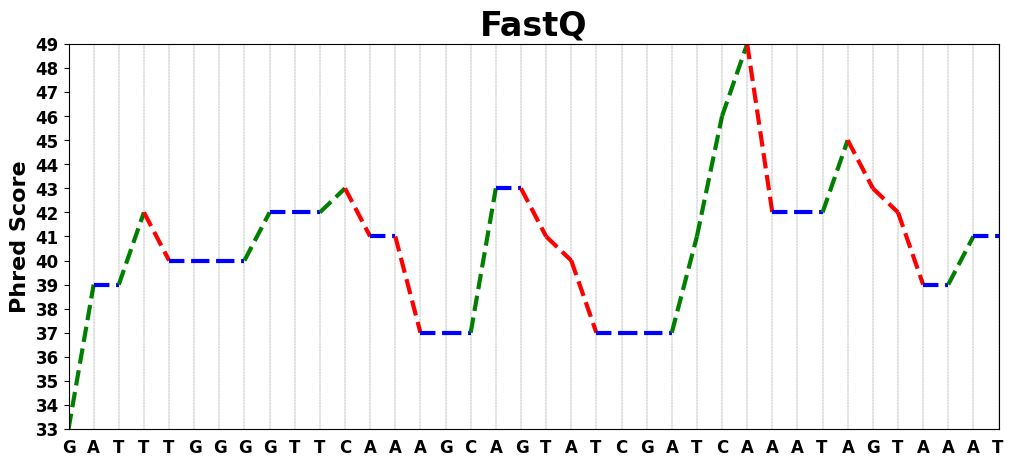

In [15]:
# sources
# https://www.biostars.org/p/317524/
# https://gatk.broadinstitute.org/hc/en-us/articles/360035531872-Phred-scaled-quality-scores
# https://www.geeksforgeeks.org/plot-a-vertical-line-in-matplotlib/
# https://en.wikipedia.org/wiki/FASTQ_format
# https://stackoverflow.com/questions/21465988/python-equivalent-to-hold-on-in-matlab
# https://stackoverflow.com/questions/63470319/pyplot-add-single-text-to-xaxis-like-a-tick

# include modules
import matplotlib.pyplot as plt
import numpy as np
import ModulesOwn.A_Groundwork as Groundwork
from ModulesExternal.TerminalColors import TerminalColors
myDefaultColor                = TerminalColors.Default


dictTargetSequence               = {}
dictTargetSequence["mySequence"] = "GATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAAT"
# Target Sequence taken from the example of the wikipedia article:
# https://en.wikipedia.org/wiki/FASTQ_format
dictTargetSequence["Quality"]    = "!''*((((***+))%%%++)(%%%%).1***-+*''))"
labelNum, labelX = Groundwork.SeqNumberGen(dictTargetSequence["mySequence"], 10)

def phredQualityTranform(mySeqQuality):
    plotvalues = []
    for ii in range(len(mySeqQuality)):
        plotvalues.append(ord(mySeqQuality[ii]))
    return plotvalues


plotvalues = phredQualityTranform(dictTargetSequence["Quality"])
x = np.arange(0, len(dictTargetSequence["Quality"]))
mcolor=[]
for ii in range(len(x)-1):
    if dictTargetSequence["mySequence"][ii] == "G":
        mcolor.append(TerminalColors.Green)
    elif dictTargetSequence["mySequence"][ii] == "C":
        mcolor.append(TerminalColors.Red)
    else:
        mcolor.append(TerminalColors.Blue)

plt.figure(figsize=(12,5))
# fig, ax = plt.subplots()
ax = plt.axes()
plt.axis([0, len(plotvalues), min(plotvalues), max(plotvalues)])
for ii in range(len(x) - 1):
    if plotvalues[ii] < plotvalues[ii + 1]:
        mcolor="green"
    elif plotvalues[ii] > plotvalues[ii + 1]:
        mcolor="red"
    else:
        mcolor="blue"
    plt.plot(x[ii:ii + 2],plotvalues[ii:ii + 2], color = mcolor, linestyle = 'dashed', linewidth = 3) #, marker='o', markerfacecolor = mcolor, markersize = 10
    plt.text(ii - 0.25, min(plotvalues) - 1, dictTargetSequence["mySequence"][ii], color = "black", weight = "bold",fontsize = 12)
    plt.axvline(x = ii + 1, color = "black", linestyle='dashed', linewidth = 0.2, label = 'axvline - full height')
plt.text(ii + 0.75, min(plotvalues) - 1, dictTargetSequence["mySequence"][ii + 1], color = "black", weight = "bold",fontsize = 12)
plt.tick_params(axis = 'x', which = 'both', bottom = False, top = False, labelbottom = False)

plt.title("FastQ", weight = "bold", fontsize = 24)
plt.ylabel('Phred Score',weight="bold",fontsize = 16) 
plt.xlim(0, max(x))
plt.xticks(x, dictTargetSequence["mySequence"])
plt.yticks(np.arange(min(plotvalues), max(plotvalues) + 1, 1.0), weight = "bold", fontsize = 12)
plt.ylim(min(plotvalues), max(plotvalues))

plt.show()

# 100. <a name="Appendix">Appendix</a>

## 100.1 <a name="htmlExportOfCode">.html-Export of Code</a>

In [16]:
# export code to html
import os
os.system("jupyter nbconvert SequenceAnalysis.ipynb --to html")

0